# Sheet 9 - K-means Clustering

Team name: DataFun

Members:

Fabian Frank
Jan Botsch
David Munkacsi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.spatial import Voronoi, voronoi_plot_2d

# 9.1 K-means Clustering

In [2]:
## 9.1 K-means Clustering
dataSet = np.loadtxt('./cluster.dat')
dataMean = dataSet.mean(axis=1).reshape((2,1))
p = dataSet.shape[1]

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


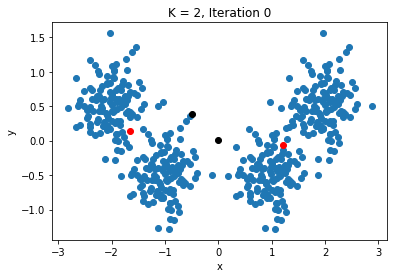

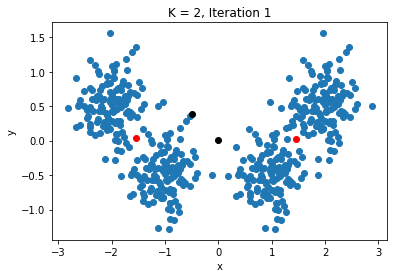

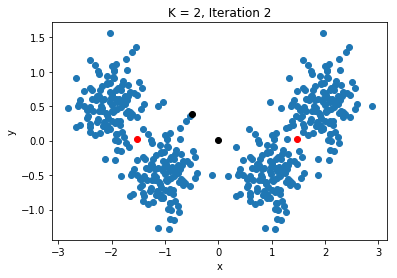

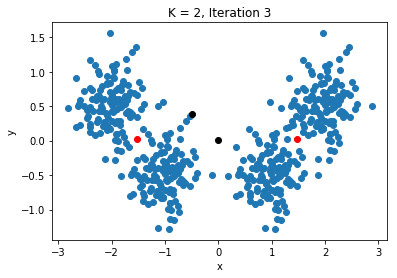

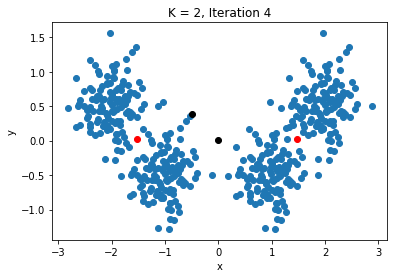

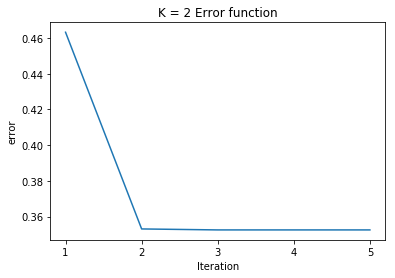

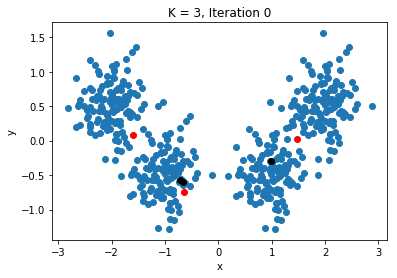

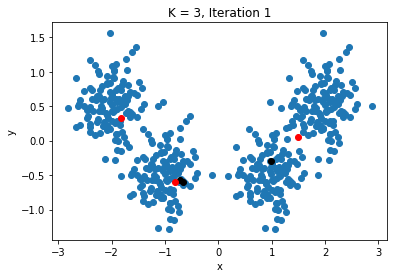

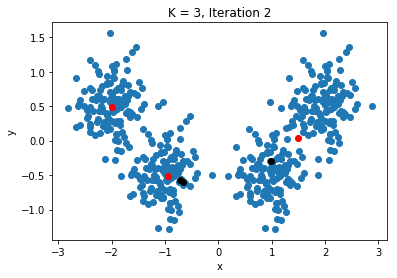

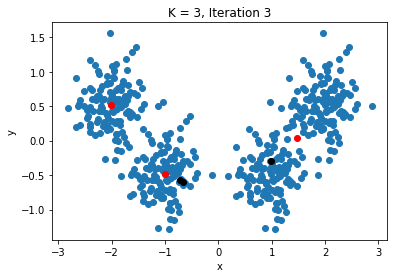

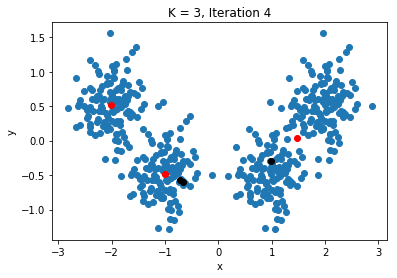

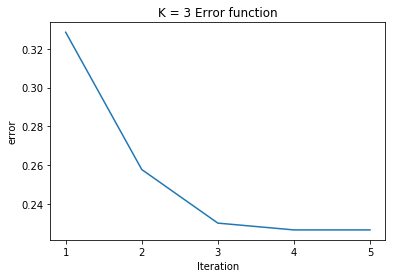

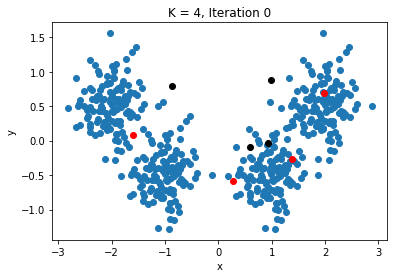

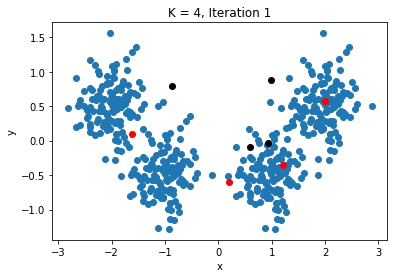

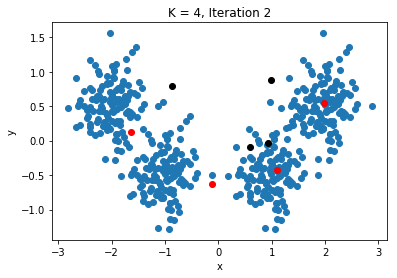

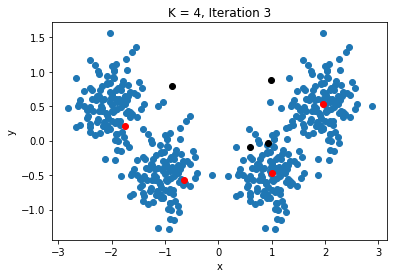

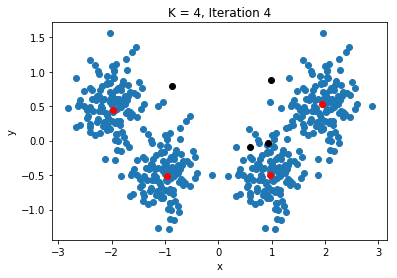

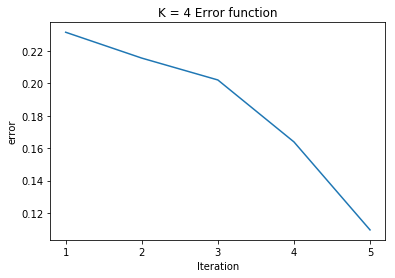

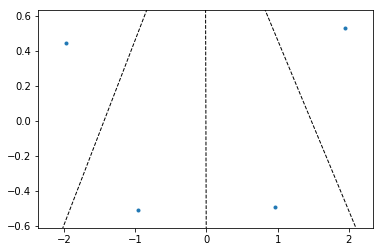

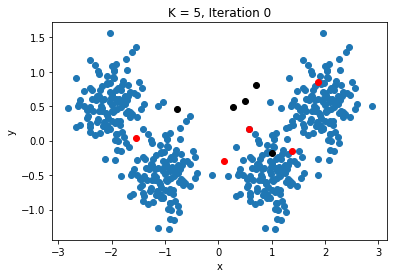

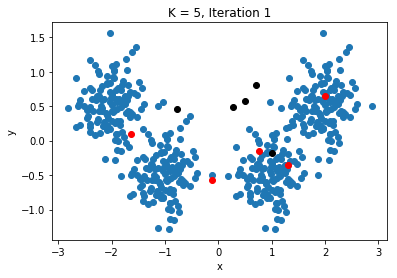

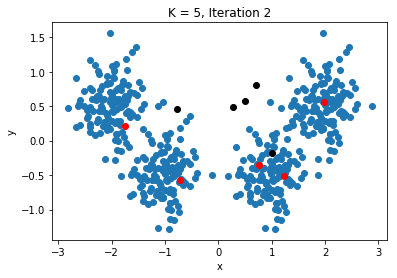

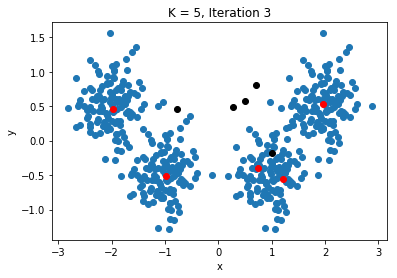

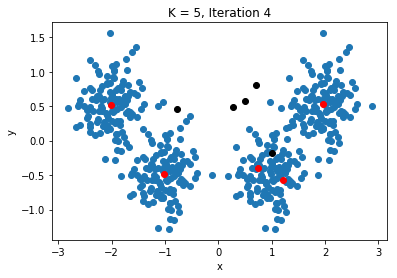

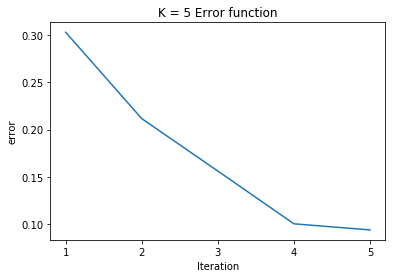

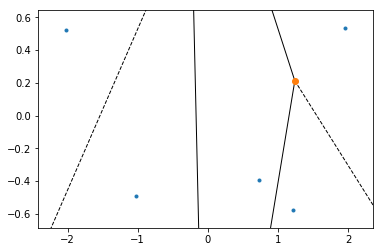

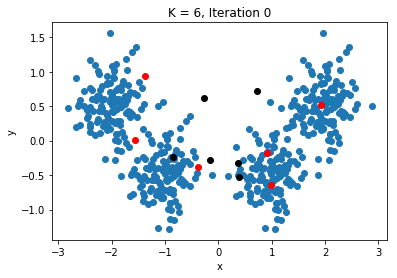

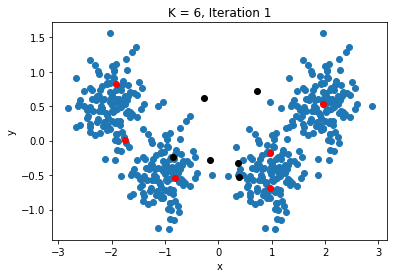

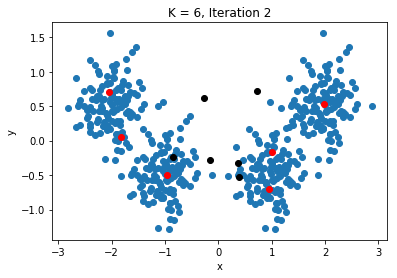

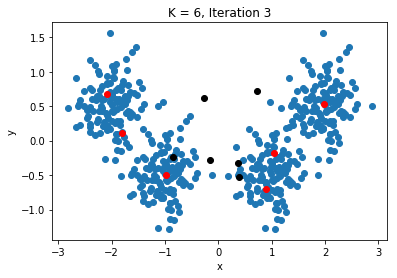

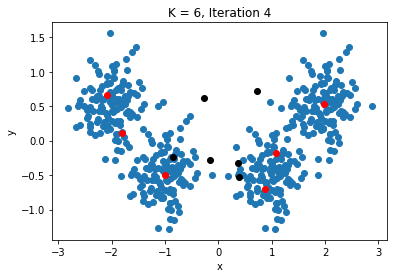

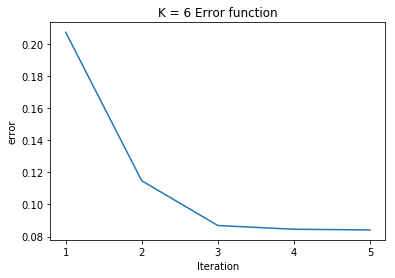

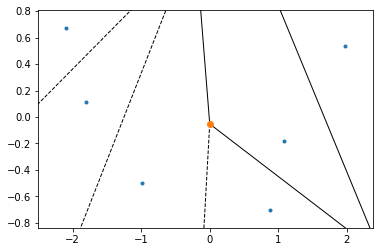

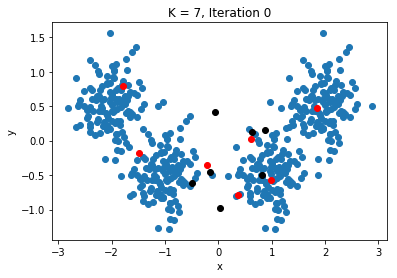

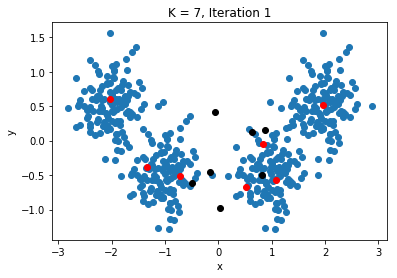

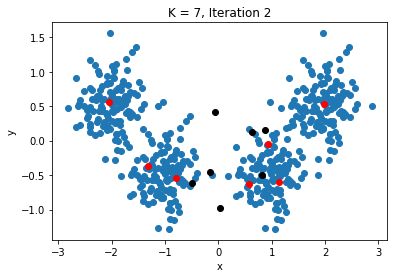

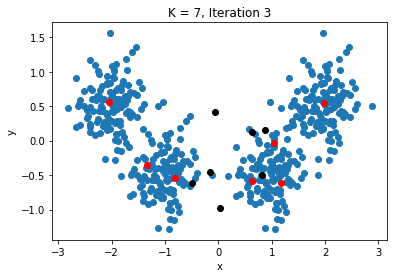

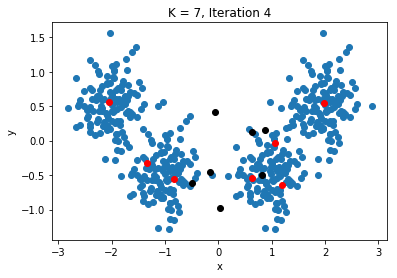

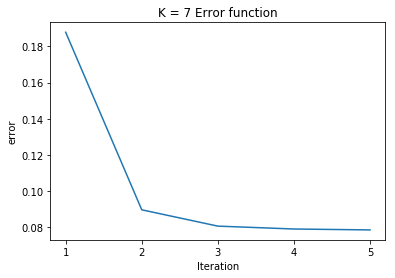

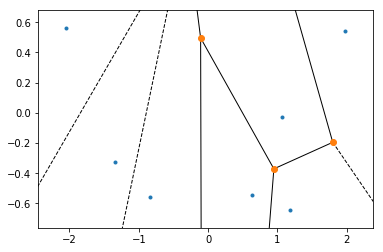

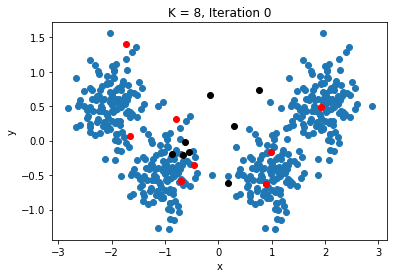

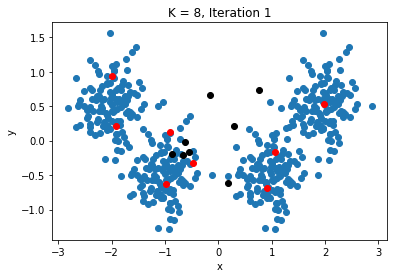

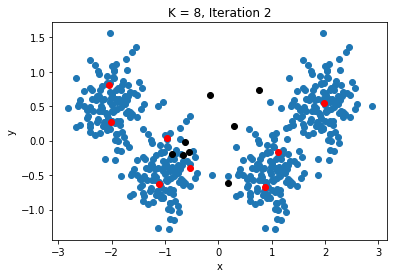

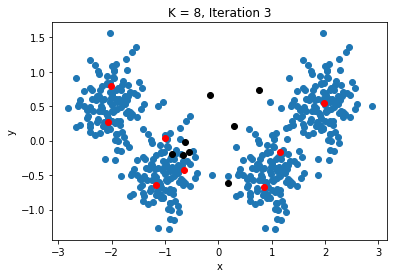

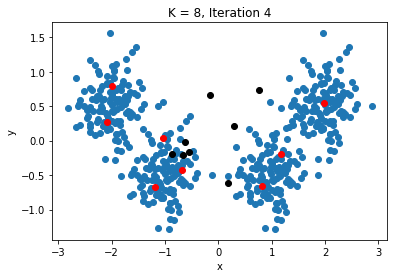

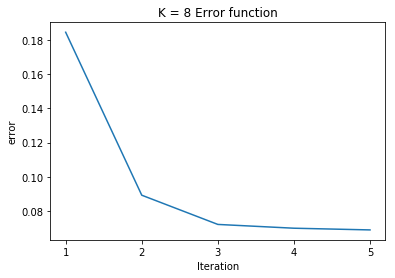

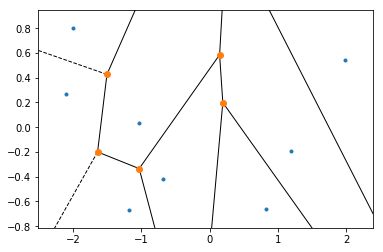

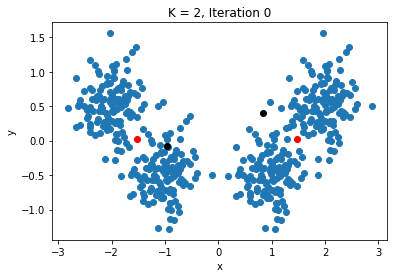

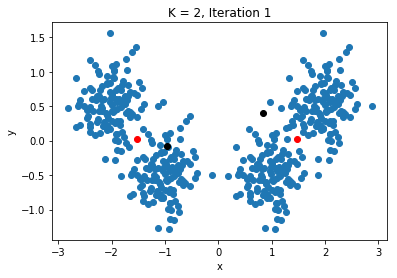

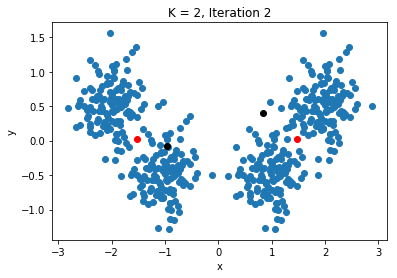

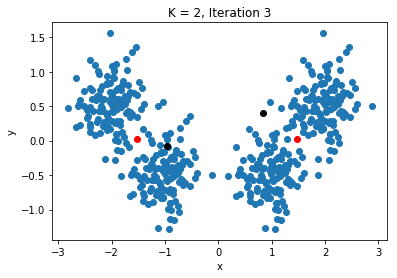

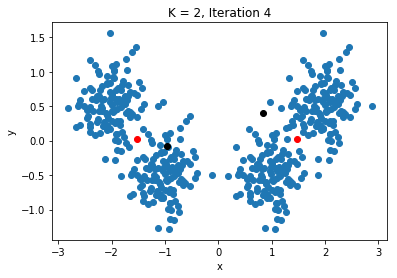

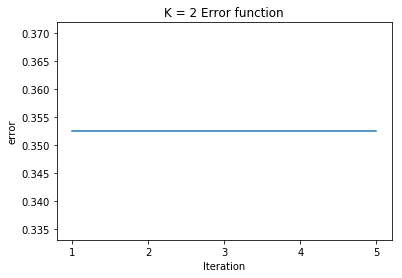

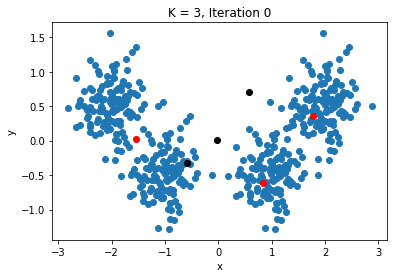

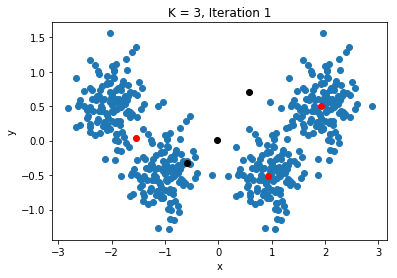

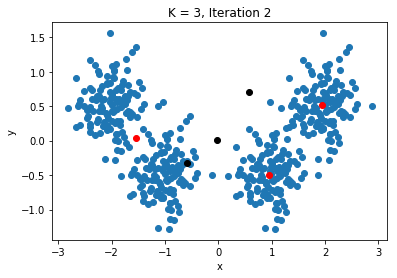

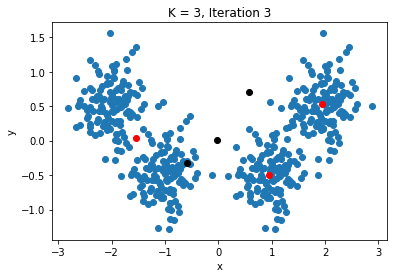

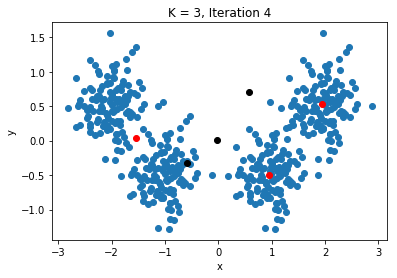

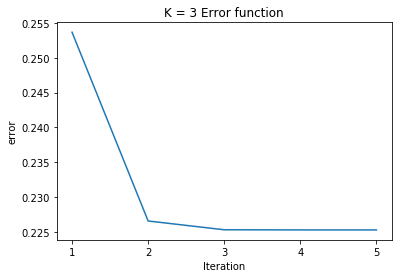

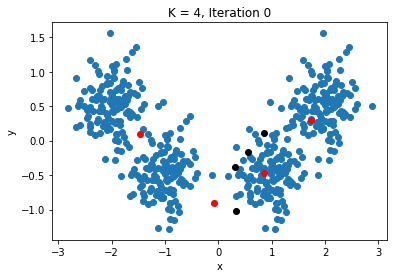

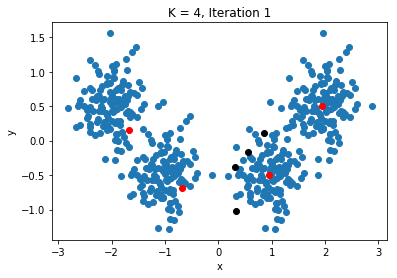

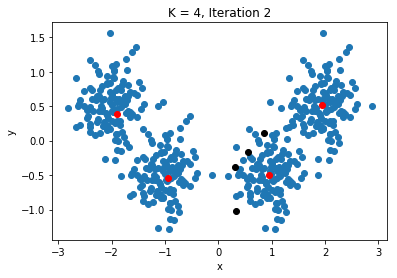

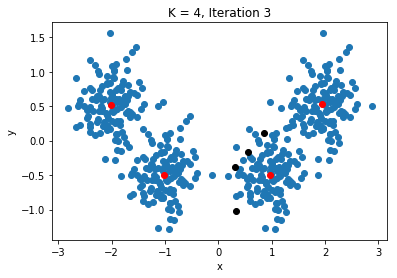

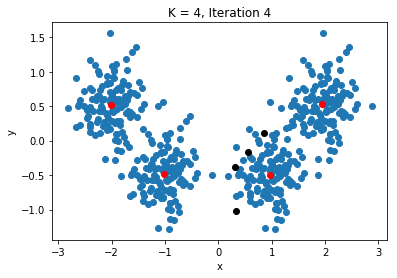

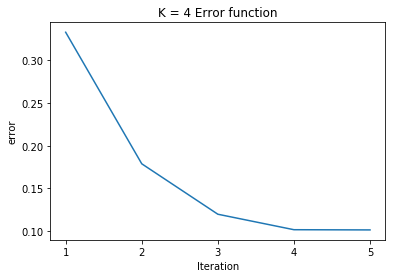

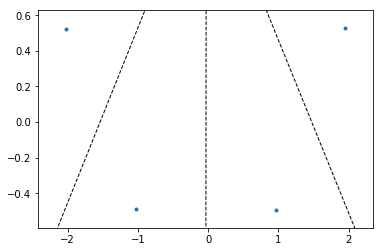

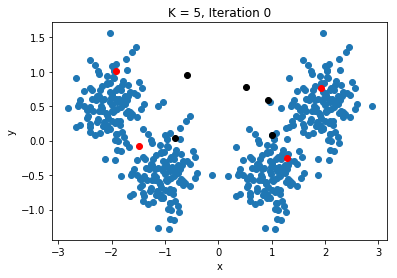

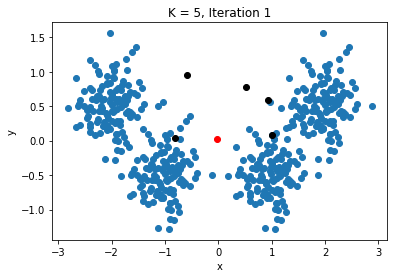

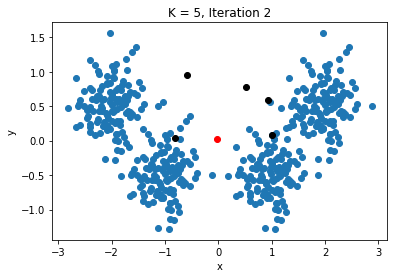

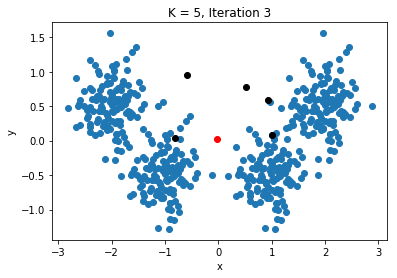

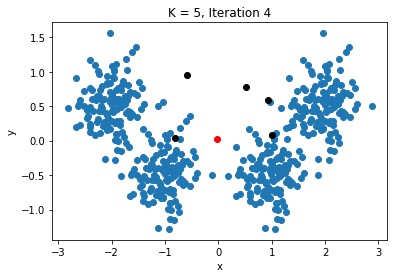

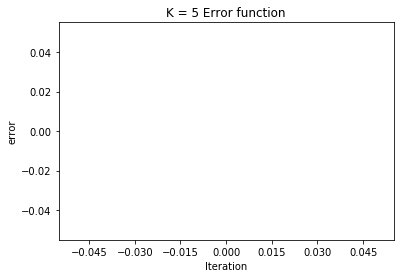

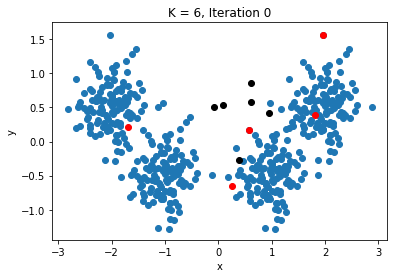

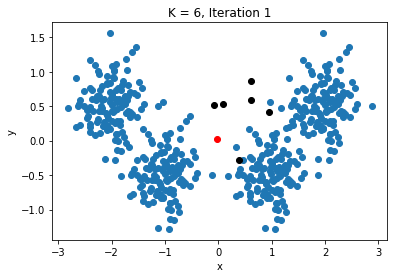

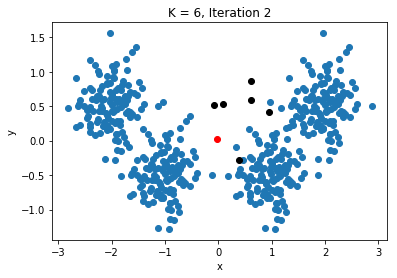

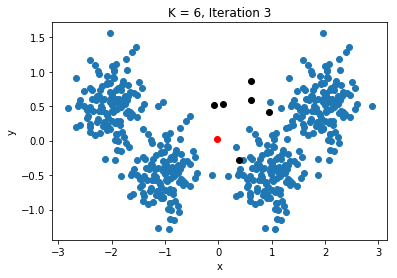

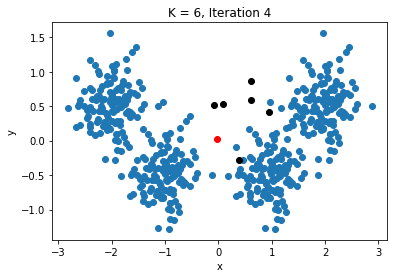

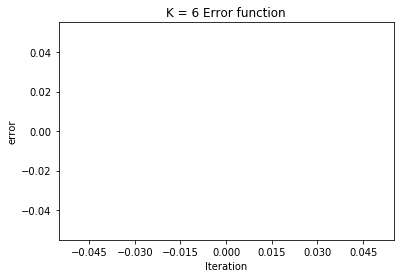

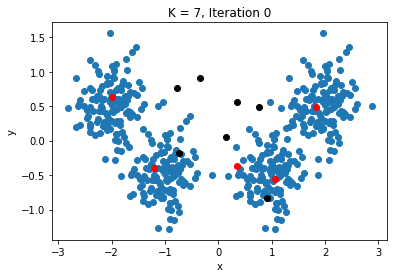

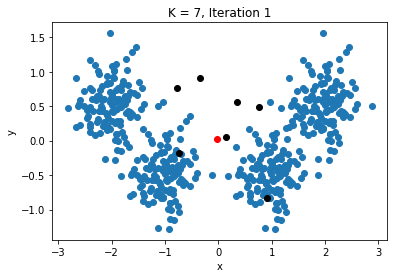

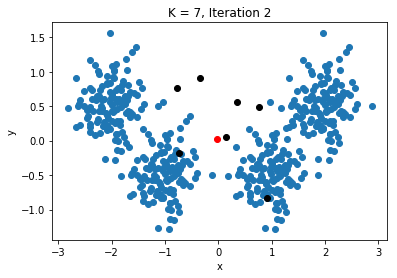

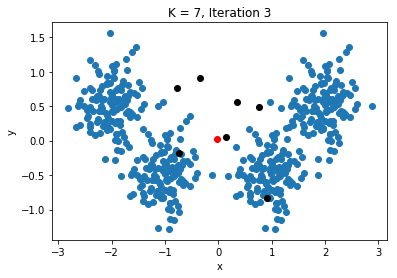

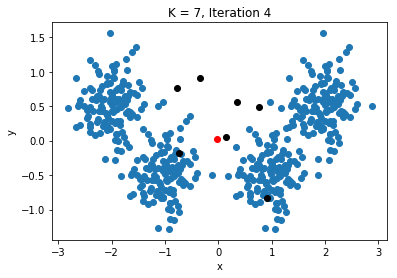

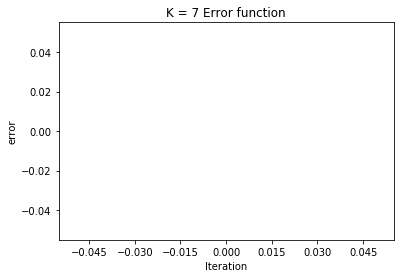

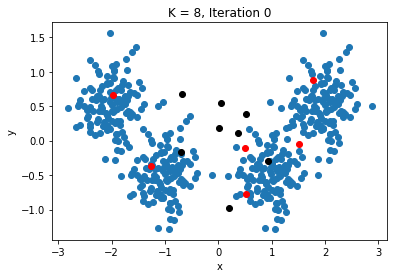

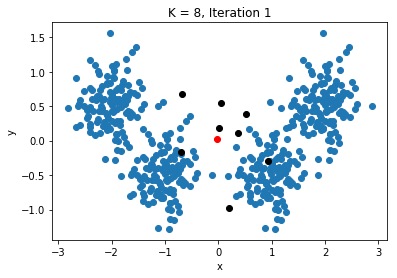

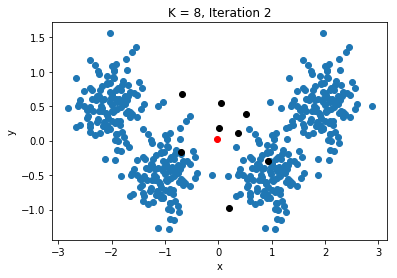

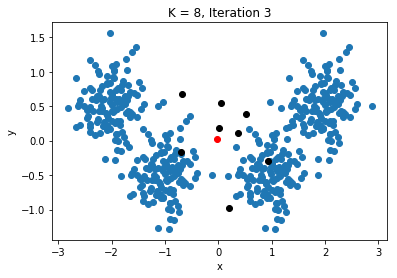

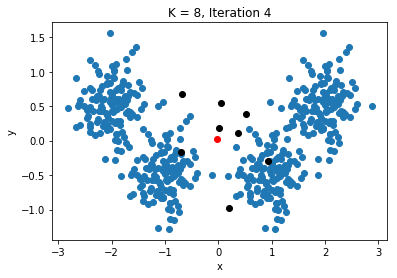

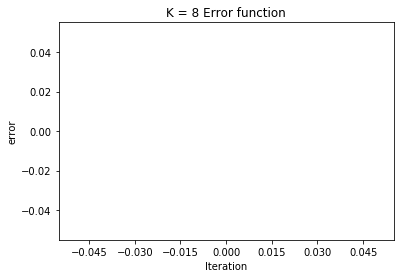

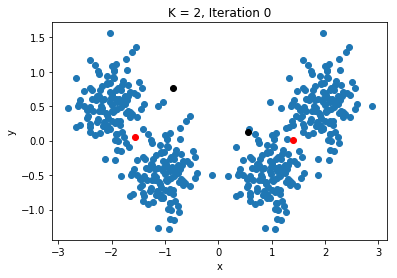

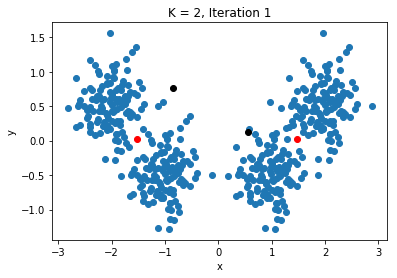

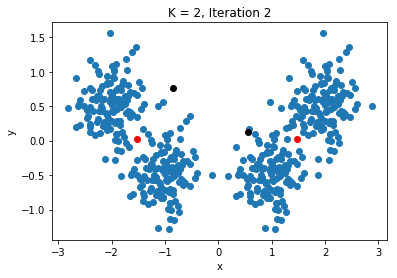

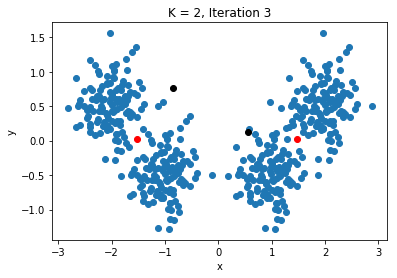

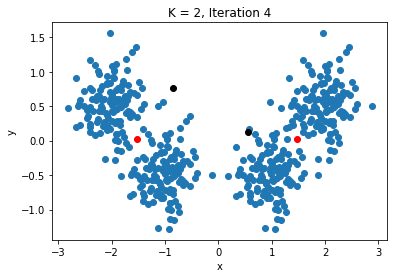

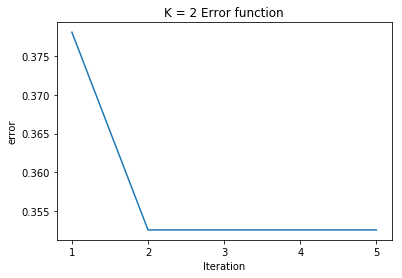

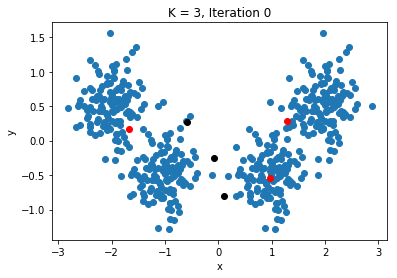

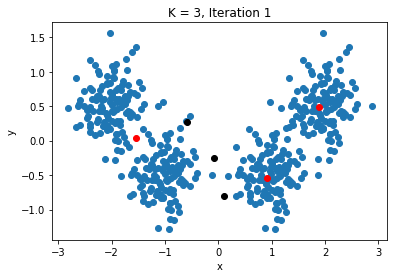

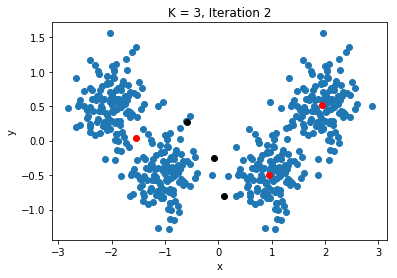

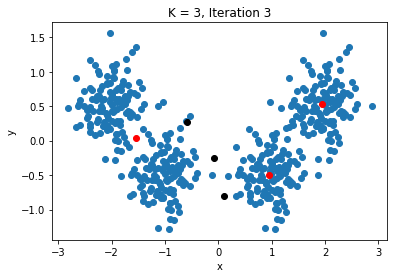

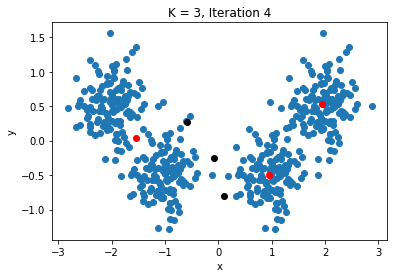

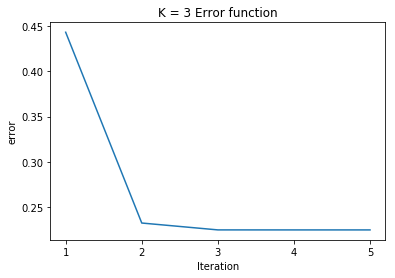

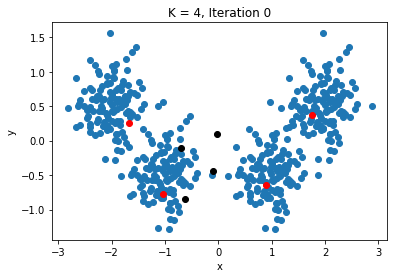

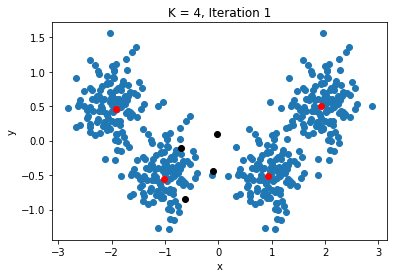

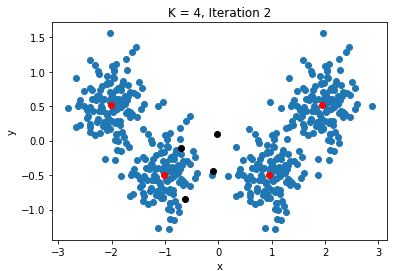

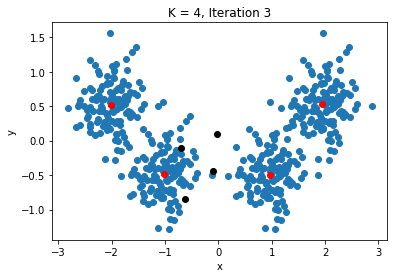

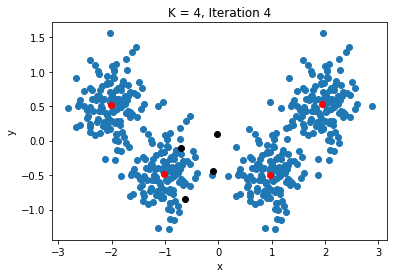

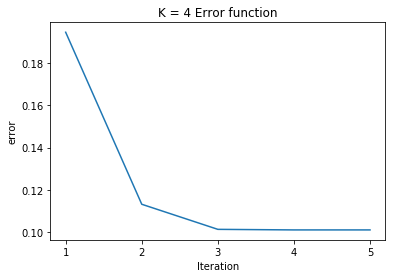

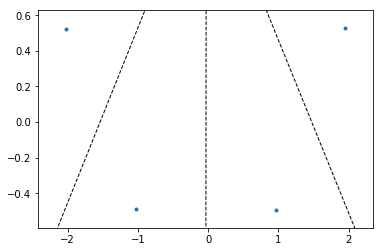

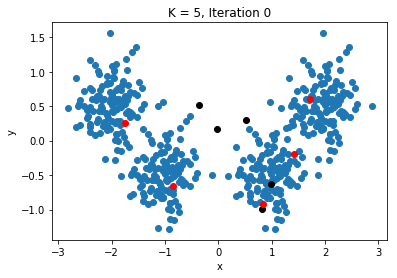

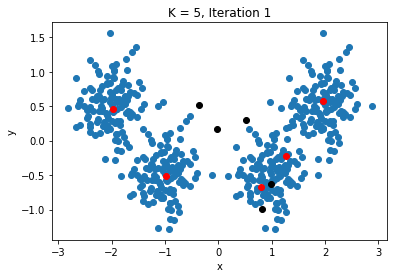

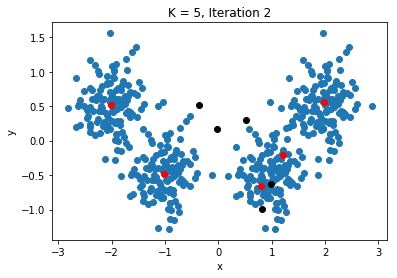

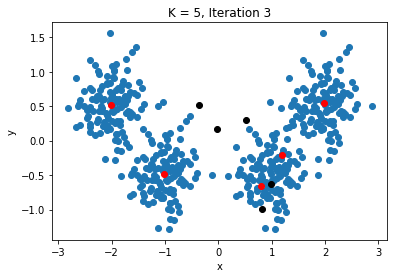

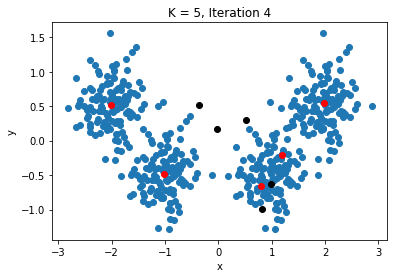

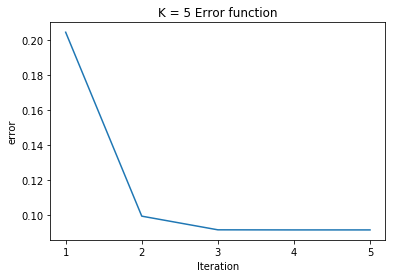

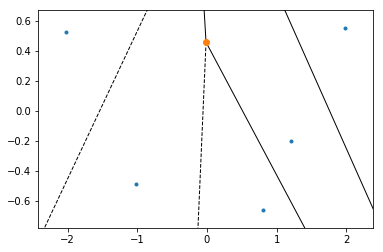

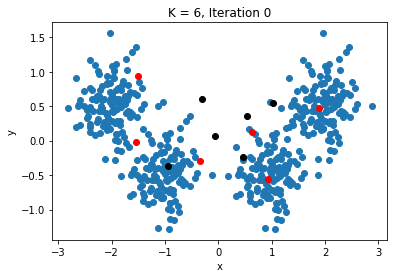

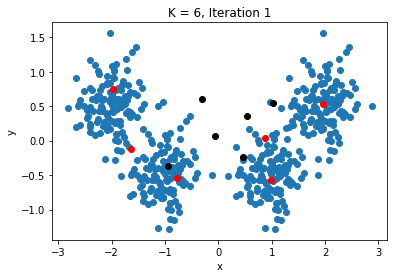

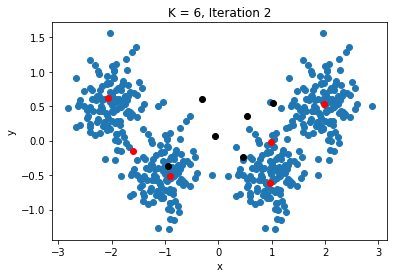

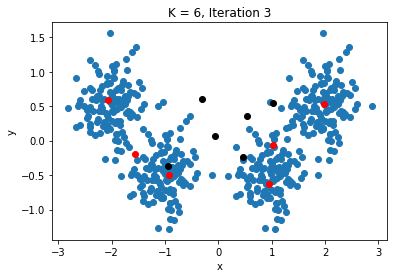

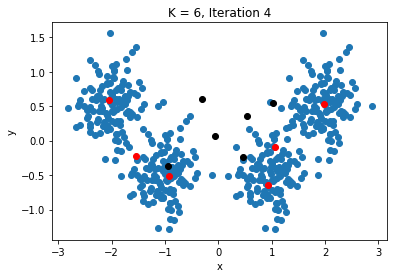

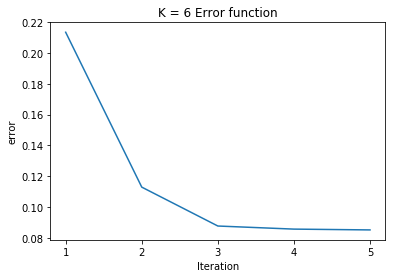

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


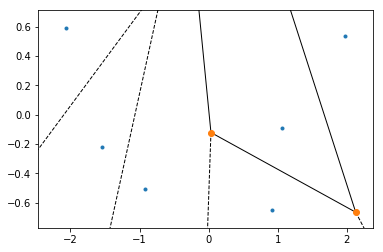

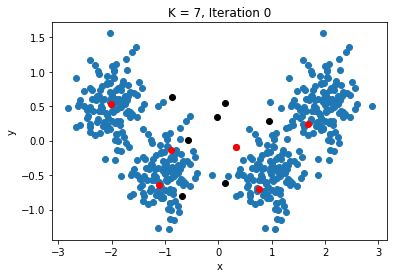

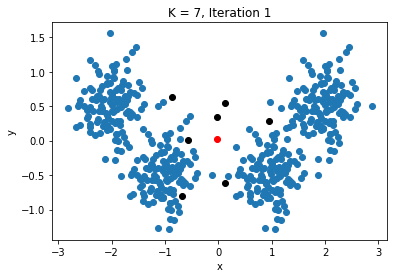

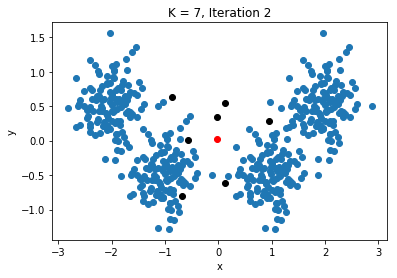

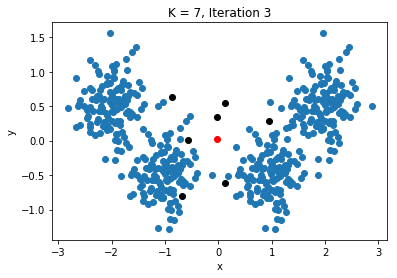

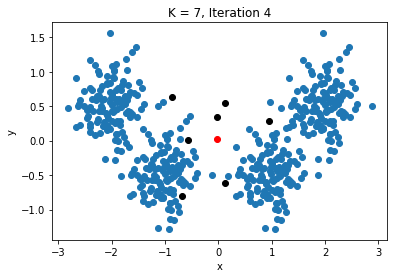

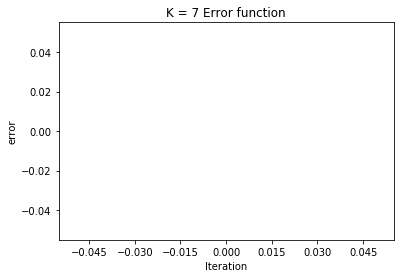

NAN in prototypes.


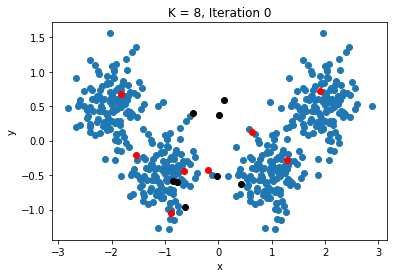

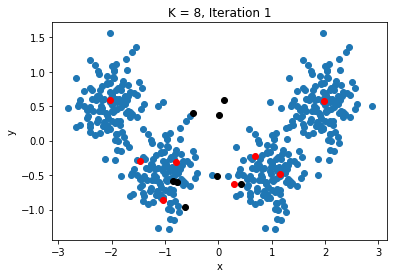

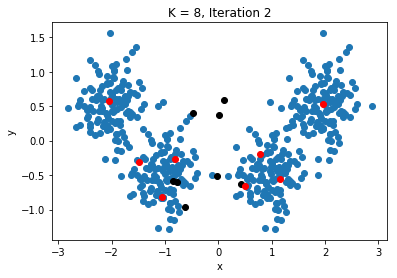

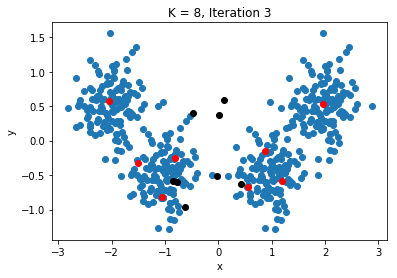

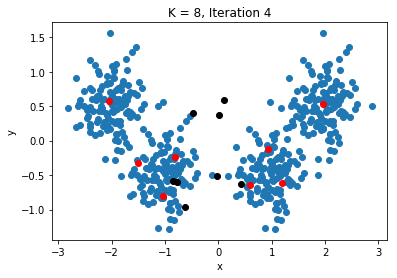

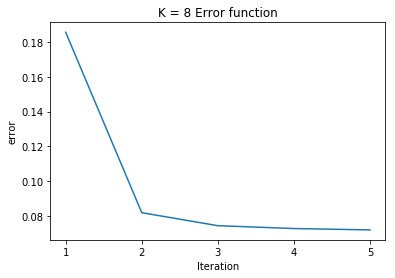

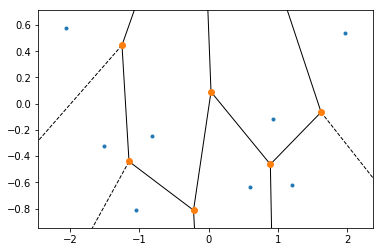

In [7]:
# Init
def init(k):
    wqInit = ((np.random.rand(2,k) - 0.5) * 2 - dataMean)
    tmax = 5
    return wqInit, tmax

# Optimization
def assignDatapoints(wq, k):
    diff = dataSet[np.newaxis,...] - wq[np.newaxis,...].T
    nor = np.linalg.norm(diff, axis=1)
    mqIdx = np.argmin(nor, axis=0)
    mq = np.zeros((dataSet.shape[1], k))
    rows = list(range(dataSet.shape[1]))
    mq[rows, mqIdx] = 1
    return mq


def choosePrototypes(mq):
    wqNew = np.dot(dataSet, mq) / np.sum(mq, axis=0)
    return wqNew

# Plot dataset
def plot(k, t):
    plt.figure()
    plt.scatter(dataSet[0], dataSet[1])
    plt.scatter(wqInit[0], wqInit[1], color='black')
    plt.scatter(wq[0], wq[1], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K = %d' % k + ', Iteration %d' %t)

# calculate error
def calculateError(mq, wq, dataSet):
    p = dataSet.shape[1]
    diff = dataSet[np.newaxis,...] - wq[np.newaxis,...].T
    nor2 = np.square(np.linalg.norm(diff, axis=1))
    err = mq*nor2.T
    err_sum = np.sum(err) / (2 * p)
#    print("sums ", err_sum)
    return err_sum

# plot error function
def plotErrorFuntion(Err, k, tmax):
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(np.arange(1,tmax + 1), Err, '-')
    plt.xlabel('Iteration')
    plt.ylabel('error')
    plt.title('K = %d' % k + ' Error function')
    plt.show()

# Error calculation
def getError(wq):
    mq = assignDatapoints(wq, wq.shape[1])
    diff = dataSet[np.newaxis,...] - wq[np.newaxis,...].T
    nor = np.linalg.norm(diff, axis=1)
    tmp = nor[np.nonzero(mq.T)]
    err = (1.0 / (2.0 * p)) * tmp.sum()
    return err

# plot error function
def plotErrorFuntion(Err, k, tmax):
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(np.arange(1,tmax + 1), Err, '-')
    plt.xlabel('Iteration')
    plt.ylabel('error')
    plt.title('K = %d' % k + ' Error function')
    plt.show()

def plotError(errArr):
    plt.figure()
    plt.plot(errArr)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Error over Iterations')
    
# got through different numbers of prototypes
# when prototypes are distributed in such a way that no datapoints are assigned
# to a prototype, then the algoithm fails --> division with 0
for k in range(2,9):
    wqInit, tmax = init(k)
    wq = np.copy(wqInit)
 #   print(k)
    Err = []

    for t in range(tmax):
        mq = assignDatapoints(wq, k)
        wq = choosePrototypes(mq)
        plot(k, t)
        plt.show()
        Err.append(calculateError(mq, wq, dataSet))
    
    plotErrorFuntion(Err, k, tmax)
# compute Voronoi tesselation
# only works for k > 3
    if k > 3:
        try:
            vor = Voronoi(wq.T)
            voronoi_plot_2d(vor)
        except:
            print("NAN in prototypes.")
plt.show()

# 9.2 Online K-means Clustering

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


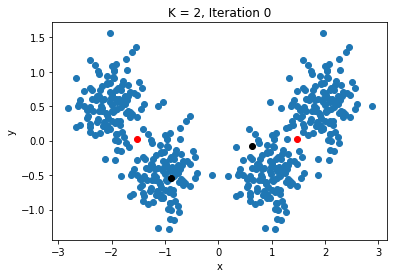

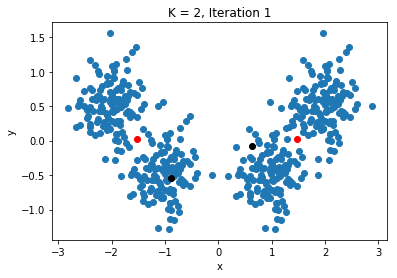

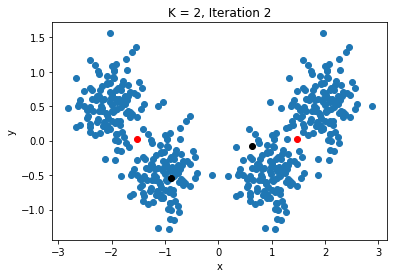

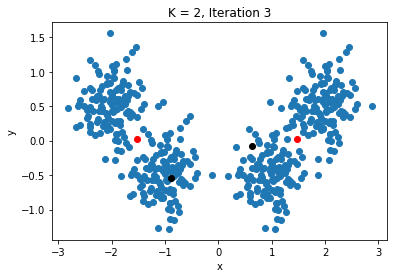

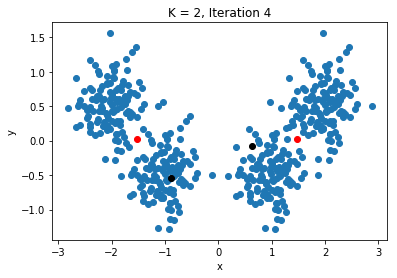

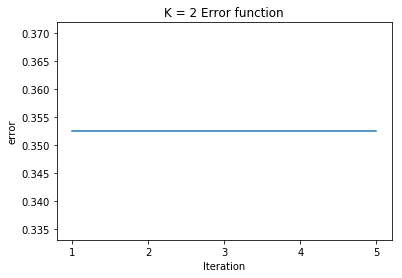

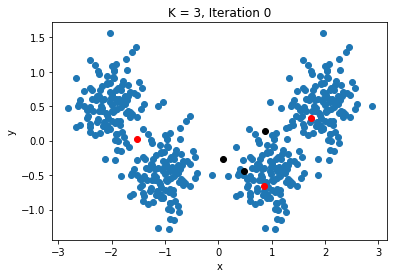

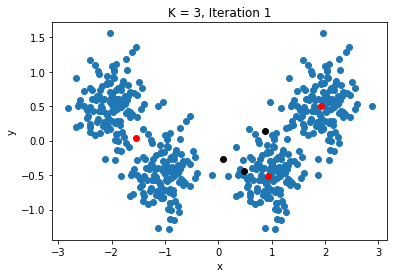

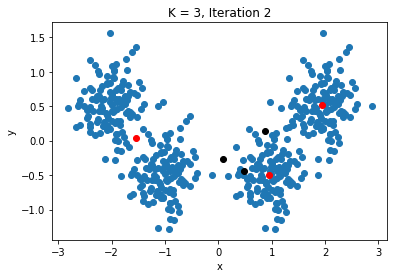

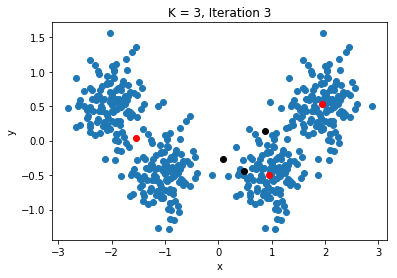

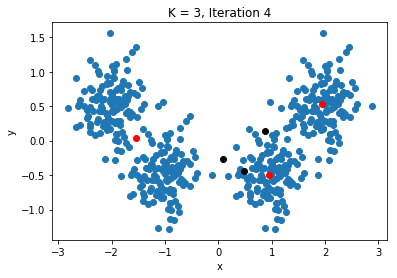

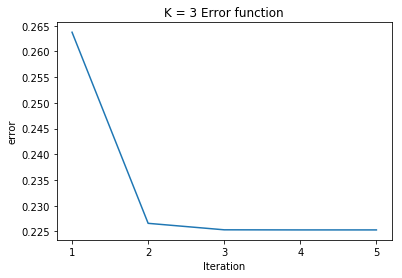

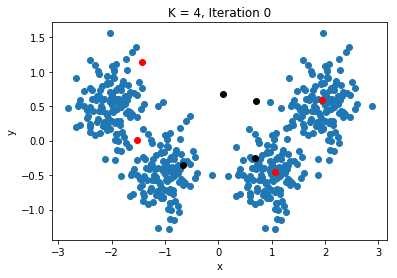

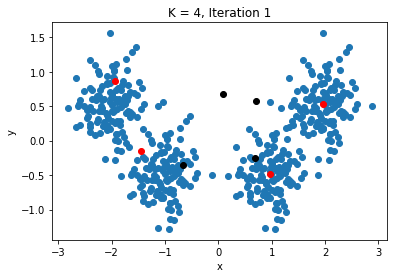

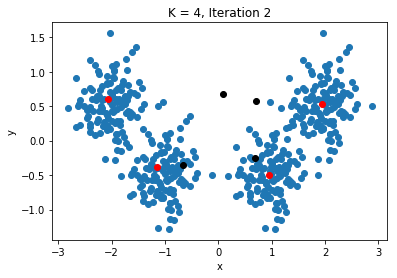

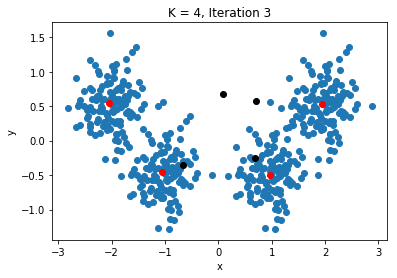

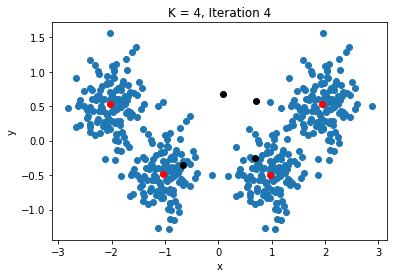

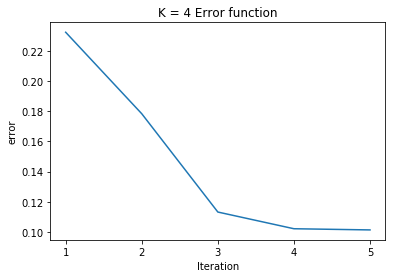

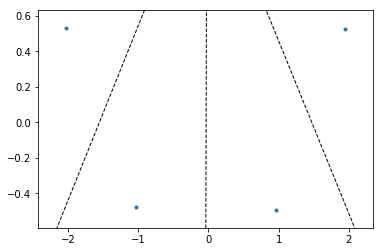

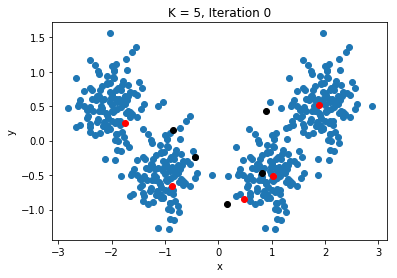

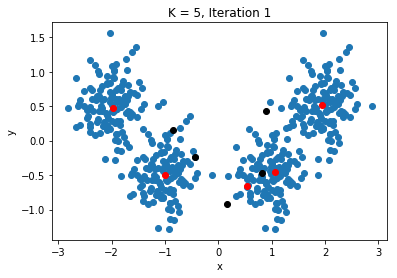

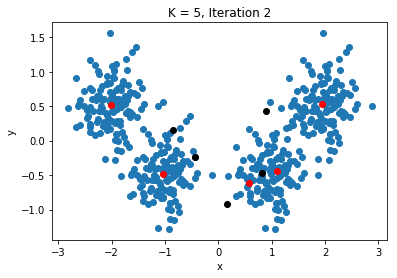

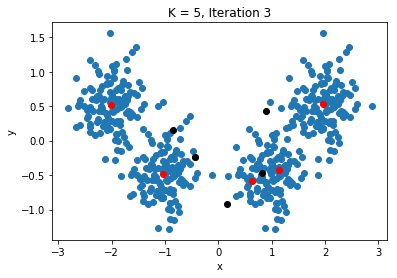

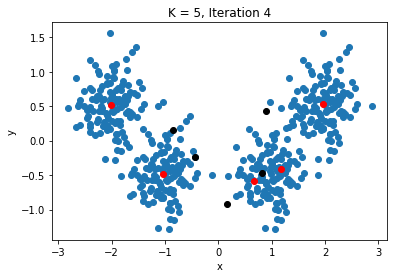

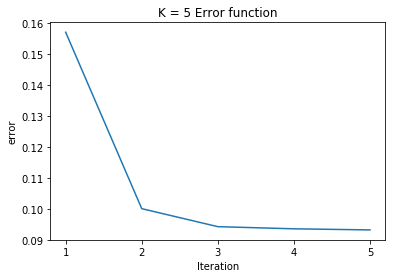

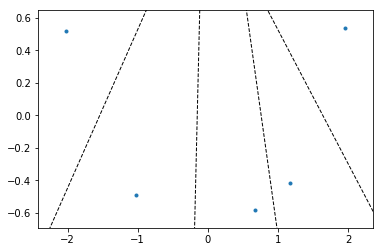

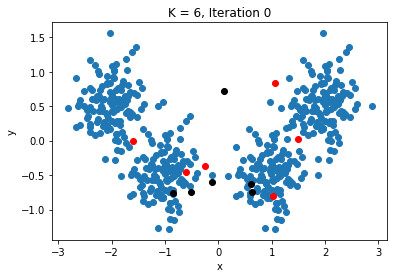

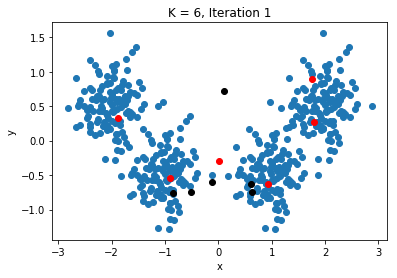

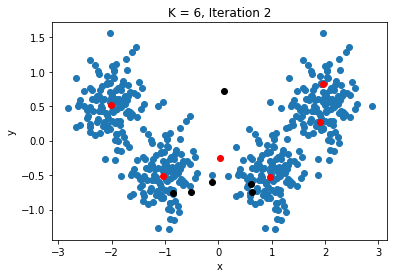

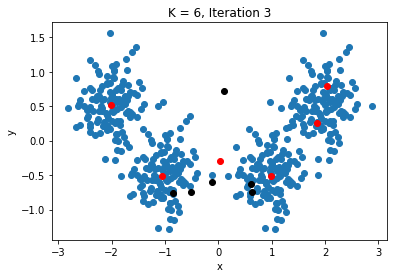

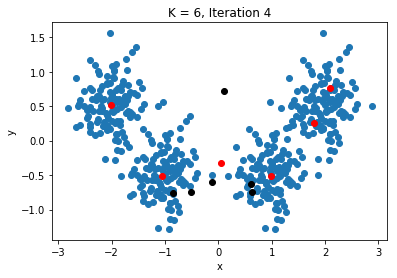

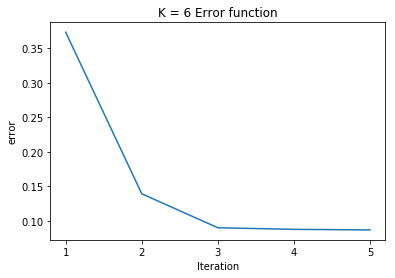

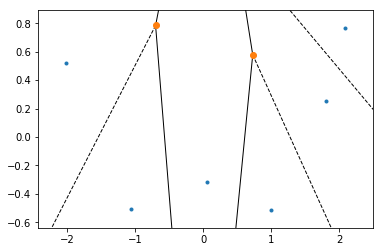

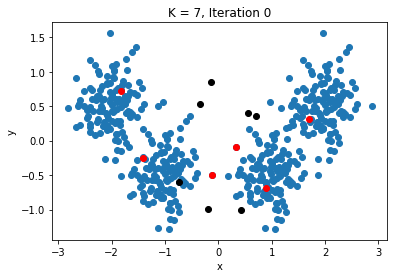

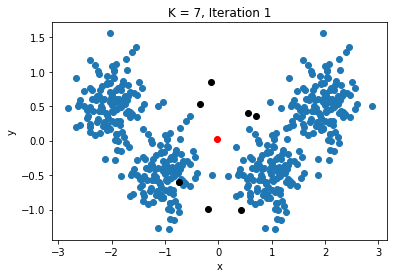

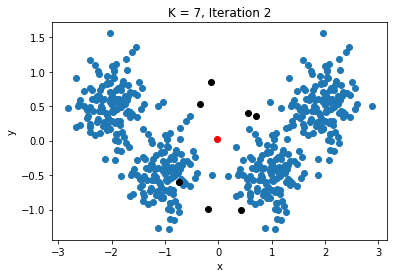

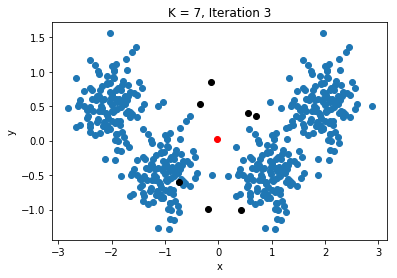

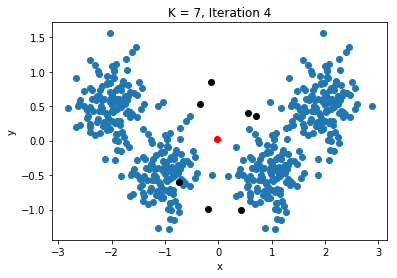

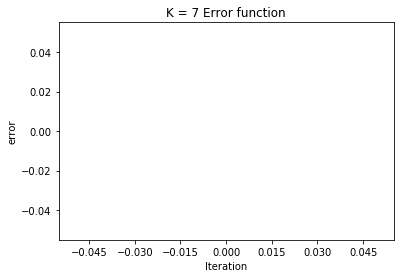

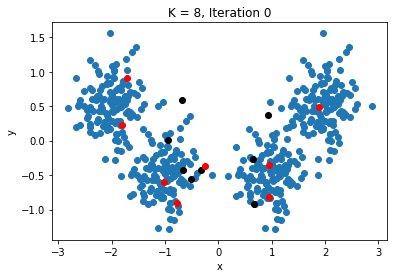

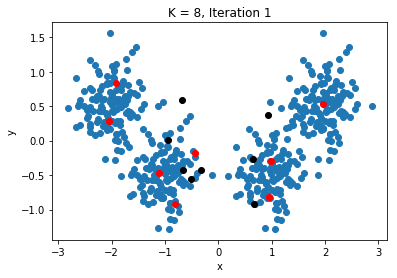

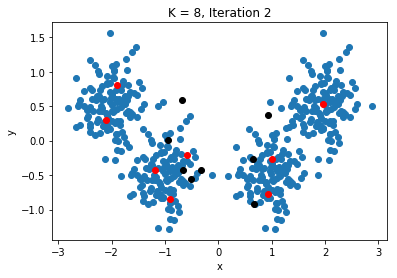

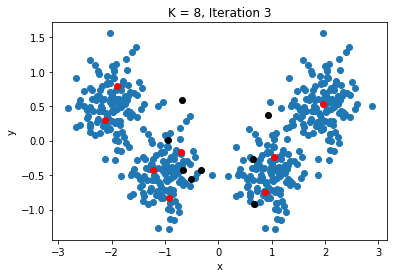

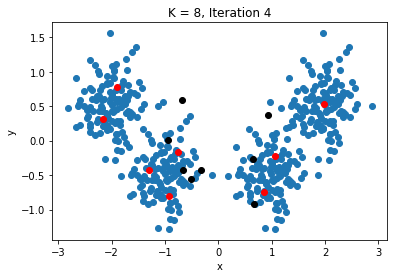

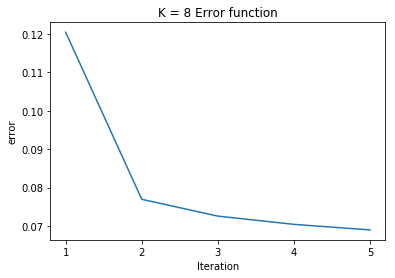

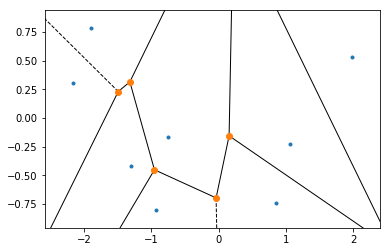

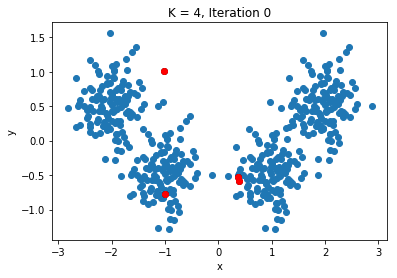

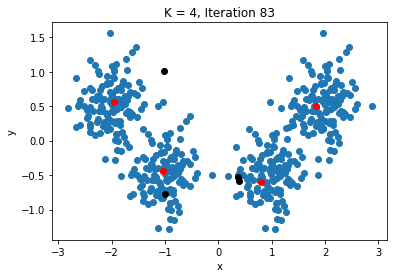

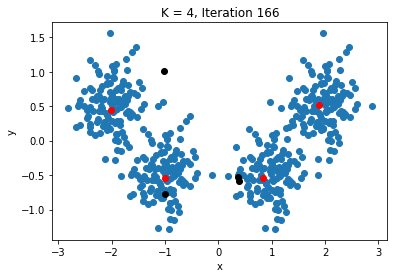

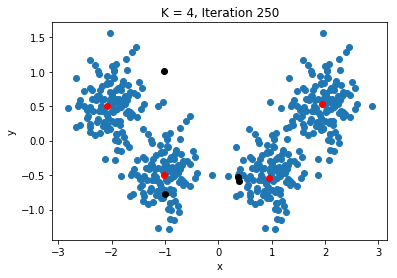

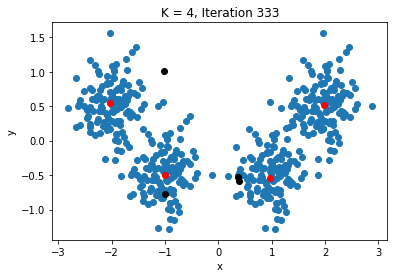

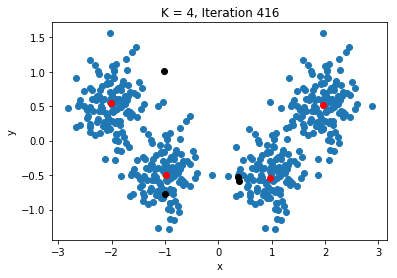

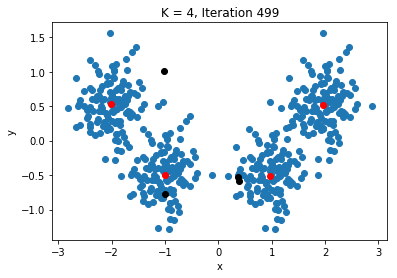

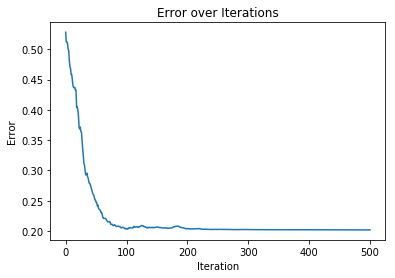

In [4]:
# Init
def initOnline(k):
    wqInit = ((np.random.rand(2,k) - 0.5 ) * 2 + dataMean)
    tmax = p
    return wqInit, tmax

# Optimization
def assignDatapointOnline(x, wq):
    diff = x - wq.T
    nor = np.linalg.norm(diff, axis=1)
    mqIdx = np.argmin(nor, axis=0)
    return mqIdx

def updatePrototypeOnline(wq, x, mqIdx, eps):
    diff = x - wq[:,mqIdx]
    dw = eps * diff
    wq[:,mqIdx] = wq[:,mqIdx] + dw
    return wq

def updateEpsilonOnline(eps,tau, tcurr, tmax):
    if t > tmax/4:
        eps = tau * eps
    return eps

#Init Online
k = 4
eps = 0.1
tau = 0.99
wqInit, tmax = initOnline(k)
wq = np.copy(wqInit)

# for plotting
itr = 1
step = (p-1)/6.0

# for Error calculation
errArr = np.zeros([tmax+1])
errArr[0] = getError(wq);

#for accessing data randomly
sfdIndices = np.random.permutation(p)

plot(k, 0)
for t in range(tmax):
    #assign datapoint to prototype
    idx = assignDatapointOnline(dataSet[:,sfdIndices[t]], wq)
    
    #update prototype position
    wq = updatePrototypeOnline(wq, dataSet[:,sfdIndices[t]], idx, eps)
    
    #update epsilon
    eps = updateEpsilonOnline(eps,tau, t, tmax)

    #get the Error
    errArr[t+1] = getError(wq)

    #plot the prototypes at certain iterations
    if (t == np.rint(itr*step)):
        plot(k, t)
        itr = itr+1

#plot the Error
plotError(errArr)
plt.show()